# Cálculo de Métricas de Evaluación para Clasificación:

## Ejemplo/Ejercicio:

In [2]:
from sklearn.datasets import load_digits
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

print("X_train: ", X_train)
print("X_test: ", X_test)
print("y_train: ", y_train)
print("y_test: ", y_test)

# Entrenar el modelo usando regresion logistica
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
model.score(X_train, y_train)



# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Mostrar las métricas
print("Exactitud:", accuracy)
print("Precisión:", precision)
print("Recuperación o sensibilidad (recall):", recall)
print("Puntuación o medida F1 (F1-score):", f1)

"""
# One-hot encode y_test and y_score
y_test_onehot = to_categorical(y_test)
y_score_onehot = to_categorical(y_pred)
# Replace "y_true" and "y_score" with your actual values

y_true = y_test_onehot.ravel()  # Replace with your actual true labels
y_score_onehot = model.predict_proba(X_test)[:, 1]  # Replace with your actual predicted probabilities

fpr, tpr, thresholds = roc_curve_multiclass(y_test_onehot, y_score_onehot)
roc_auc = auc(fpr, tpr)

# Calculate FPR at a specific threshold (e.g., 0.5)
fpr_at_threshold = fpr[np.argmax(tpr > 0.5)]

# Calculate TPR at a specific threshold (e.g., 0.5)
tpr_at_threshold = tpr[np.argmax(tpr > 0.5)]
"""
# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

y_score = model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Now you can use fpr, tpr, and roc_auc to plot or analyze the ROC curves for each class.


X_train:  (1437, 64)
X_test:  (360, 64)
y_train:  (1437,)
y_test:  (360,)
X_train:  [[ 0.  0.  3. ... 13.  4.  0.]
 [ 0.  0.  9. ...  3.  0.  0.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  9. ... 16.  2.  0.]
 [ 0.  0.  1. ...  0.  0.  0.]
 [ 0.  0.  1. ...  1.  0.  0.]]
X_test:  [[ 0.  0.  0. ... 14.  5.  0.]
 [ 0.  0. 11. ...  1.  0.  0.]
 [ 0.  0.  8. ...  8.  0.  0.]
 ...
 [ 0.  0.  7. ... 10.  0.  0.]
 [ 0.  0.  7. ... 16.  4.  0.]
 [ 0.  0. 14. ...  5.  0.  0.]]
y_train:  [6 0 0 ... 2 7 1]
y_test:  [6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8

### TAREA en clase/casa (reference - pumpkins homework):

Usando alguna herramienta de IA, consultar (dos versiones: para codificar "a mano" y con código python existente en bobliotecas):

1. Qué es y cómo se obtiene la matriz de confusíón:

The confusion matrix is a table that summarizes the performance of a classification model. It shows the number of correct and incorrect predictions for each class.
To obtain the confusion matrix, you first need to make predictions on a set of data. This can be done using the predict method of your trained model.
Once you have your predictions, you can use the confusion_matrix function from the sklearn.metrics module to calculate the confusion matrix.
2. Analizar el resultado de la matriz de confusión del anterior ejemplo/ejercicio.

En la tabla de la matriz de confusión se resume el desempeño de un modelo de clasificación motrando el número de predicciones correctas e incorrectas para cada clase.  lo que sirve para analizar los resultados de una matriz de confusión se deben observar las siguientes métricas:

Accuracy: Es el porcentaje general de predicciones correctas. Se calcula dividiendo el número de predicciones correctas por el número total de predicciones.
Precisión: Que es el porcentaje de predicciones positivas que realmente son correctas. Se calcula dividiendo el número de verdaderos positivos por el número total de predicciones positivas.
Recall: Es el porcentaje de positivos reales que se predicen correctamente. Se calcula dividiendo el número de verdaderos positivos por el número total de positivos reales.
F1 score: Es la media armónica de precisión y recuperación. Se calcula tomando el promedio ponderado de precisión y recuperación, donde el peso es 2.

3. Obtener las formulas de TP, TN, FP, FN, precision, recall, F1-score, support.

# True Positives (TP):
tp = confusion_matrix[0, 0]
# True Negatives (TN):
tn = confusion_matrix[1, 1]
# False Positives (FP):
fp = confusion_matrix[0, 1]
# False Negatives (FN):
fn = confusion_matrix[1, 0]
# Precision:
precision = tp / (tp + fp)
# Recall:
recall = tp / (tp + fn)
# F1 score:
f1_score = 2 * (precision * recall) / (precision + recall)
# Support:
support = tp + tn + fp + fn

4. Apartir de la matriz de confusión, interpretar los resultados del item 3.
5. Con base en lo anterior, calcular, graficar e interpretar: FPR, TPR, ROC, AUC.


Matriz de confusión:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]
TP: 33
TN: 28
FP: 0
FN: 0
Precision: 1.0
Recall: 1.0
F1 score: 1.0
Support: 61


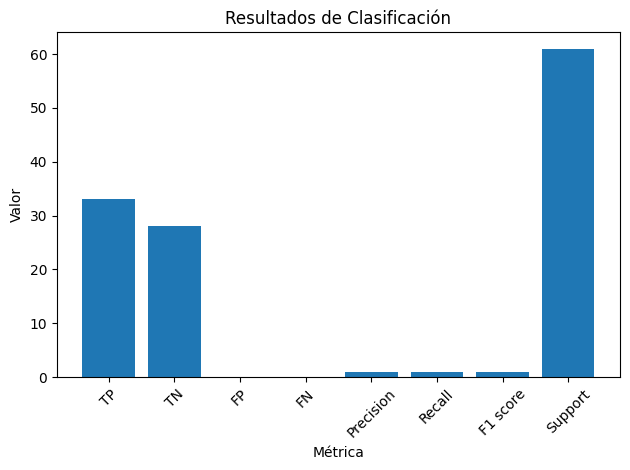

In [3]:
# Calcular Confusión Matriz
cm = confusion_matrix(y_test, y_pred)

# True Positives (TP):
tp = cm[0, 0]
# True Negatives (TN):
tn = cm[1, 1]
# False Positives (FP):
fp = cm[0, 1]
# False Negatives (FN):
fn = cm[1, 0]
# Precision:
precision = tp / (tp + fp)
# Recall:
recall = tp / (tp + fn)
# F1 score:
f1_score = 2 * (precision * recall) / (precision + recall)
# Support:
support = tp + tn + fp + fn

# Mostrar las los datos de la matriz de confusión

print("Matriz de confusión:")
print(cm)
print("TP:", tp)
print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1_score)
print("Support:", support)

import pandas as pd

data = {'Métrica': ['TP', 'TN', 'FP', 'FN', 'Precision', 'Recall', 'F1 score', 'Support'],
        'Valor': [33, 28, 0, 0, 1.0, 1.0, 1.0, 61]}

df = pd.DataFrame(data)

plt.bar(df['Métrica'], df['Valor'])
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Resultados de Clasificación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [4]:
tp1 = 0
tn1 = 0
fp1 = 0
fn1 = 0
for yt, yp in zip(y_test, y_pred):
    if yt == 1 and yp == 1:
        tp1 += 1
    elif yt == 0 and yp == 0:
        tn1 += 1
    else:
        if yp == 1:
            fp1 += 1
        else:
            fn1 += 1

print("TP:", tp1)
print("TN:", tn1)
print("FP:", fp1)
print("FN:", fn1)

TP: 28
TN: 33
FP: 1
FN: 298


Class 0:
ROC AUC: 1.0
FPR at threshold: 0.0
TPR at threshold: 1.0
Class 1:
ROC AUC: 0.9995697074010327
FPR at threshold: 0.0
TPR at threshold: 0.8571428571428571
Class 2:
ROC AUC: 1.0
FPR at threshold: 0.0
TPR at threshold: 1.0
Class 3:
ROC AUC: 0.9963009743774811
FPR at threshold: 0.0
TPR at threshold: 0.9705882352941176
Class 4:
ROC AUC: 0.9996538355026309
FPR at threshold: 0.0
TPR at threshold: 0.9782608695652174
Class 5:
ROC AUC: 0.9972129698864796
FPR at threshold: 0.0
TPR at threshold: 0.7021276595744681
Class 6:
ROC AUC: 0.9983296703296703
FPR at threshold: 0.0
TPR at threshold: 0.9714285714285714
Class 7:
ROC AUC: 0.9999097798628654
FPR at threshold: 0.0
TPR at threshold: 0.9705882352941176
Class 8:
ROC AUC: 0.9992929292929292
FPR at threshold: 0.0
TPR at threshold: 0.9666666666666667
Class 9:
ROC AUC: 0.999140625
FPR at threshold: 0.0
TPR at threshold: 0.9


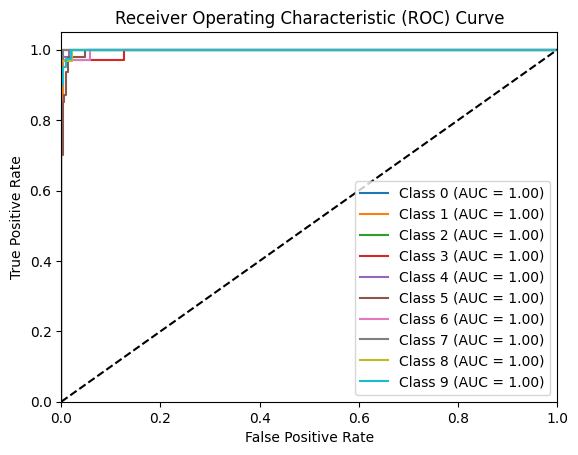

In [15]:
from sklearn.preprocessing import LabelBinarizer

# Binarize the labels
lb = LabelBinarizer()
y_true_binarized = lb.fit_transform(y_test) # Use y_test instead of y_true

# Iterate over each class for ROC calculation
for i in range(y_true_binarized.shape[1]):
    # No need to binarize y_score, it's already probabilities
    y_score_for_roc = y_score[:, i] # Assuming you want ROC for class 1

    # Calculate the ROC curve
    fpr, tpr, thresholds = roc_curve(y_true_binarized[:, i], y_score_for_roc)

    # Calculate the AUC
    roc_auc = auc(fpr, tpr)

    # Calculate FPR and TPR at a specific threshold
    fpr_at_threshold = fpr[np.argmax(tpr > 0.5)]
    tpr_at_threshold = tpr[np.argmax(tpr > 0.5)]

    print(f"Class {i}:")
    print("ROC AUC:", roc_auc)
    print("FPR at threshold:", fpr_at_threshold)
    print("TPR at threshold:", tpr_at_threshold)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label='Class %d (AUC = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()